# **MATRIZ DE ROTACIÓN Y TRASLACIÓN**

# MATRIZ DE ROTACIÓN

 **Iniciamos importanto las librerias a utilizar**

*numpy* para el manejo de calculos.

*sympy* cálculos simbólicos en especial el tema de matrices.

*plt* para la generación de gráficos.


In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

**Definimos variables**

Declaramos variables para el ángulo theta y desplazamientos en tx y ty

In [ ]:
theta, tx, ty = sp.symbols('theta tc ty')
x, y = sp.symbols('x y')

**Creación de la matriz de rotación**

aquí trabajamos con la matriz de rotación y extensión a coordenadas homogeneas.

La matriz de rotación en 2D (sin traslación) se define como:

 R(theta) = [ cos(theta)   -sin(theta) ]
            [ sin(theta)    cos(theta) ]

In [ ]:
R = sp.Matrix([[sp.cos(theta), -sp.sin(theta)],
               [sp.sin(theta),  sp.cos(theta)]])

# Matriz de traslación



Para poder conbinar con traslación usando las coordenadas homogeneas extendemos a una matriz de 3x3.

Así que creamos una matriz identidad de 3x3 y reemplazamos el bloque superior izquierdo por R.

In [ ]:
R_h = sp.eye(3)
R_h[0:2, 0:2] = R

Aquí tenemos la nueva matriz de 3x3

In [ ]:
T = sp.Matrix([[1, 0, tx],
               [0, 1, ty],
               [0, 0, 1]])

Tomamos como ejemplo el punto (1, 0) y lo convertimos en coordenadas homogeneas, añadimos un 1 al final.

In [ ]:
P_sym = sp.Matrix([1, 0, 1])

Evaluamos la transformación de rotación.

Quremos que el punto rote 45° (radianes), así que sustituimos pi/4 radianes en la matriz de rotación homogénea

In [ ]:
theta_val = sp.pi / 4
R_h_eval = R_h.subs(theta, theta_val)

Aplicamos la transformación multiplicando la rotación evaluada por el punto.

Además obtenemos la evaluación numéroca para trabajar con decimales.

In [ ]:
P_rot_sym = R_h_eval * P_sym
P_rot_eval = sp.N(P_rot_sym)

**Definimos desplazamiento**

3 unidades en x

2 unidades en y

aplicamos traslación al punto original y hacemos evaluación numérica del resultado.

In [ ]:
T_eval = T.subs({tx: 3, ty: 2})

P_trans_sym = T_eval * P_sym

P_trans_eval = sp.N(P_trans_sym)


**Impresión de resultados simbólico y numérico**

In [ ]:
print("Matriz de rotación (homogénea) evaluada a 45°:")
sp.pprint(R_h_eval)
print("\nPunto original (en coordenadas homogéneas):")
sp.pprint(P_sym)
print("\nPunto rotado (resultado simbólico):")
sp.pprint(P_rot_sym)
print("\nPunto rotado (evaluación numérica):")
sp.pprint(P_rot_eval)

print("\nMatriz de traslación evaluada (tx=3, ty=2):")
sp.pprint(T_eval)
print("\nPunto trasladado (resultado simbólico):")
sp.pprint(P_trans_sym)
print("\nPunto trasladado (evaluación numérica):")
sp.pprint(P_trans_eval)

Matriz de rotación (homogénea) evaluada a 45°:
⎡√2  -√2    ⎤
⎢──  ────  0⎥
⎢2    2     ⎥
⎢           ⎥
⎢√2   √2    ⎥
⎢──   ──   0⎥
⎢2    2     ⎥
⎢           ⎥
⎣0    0    1⎦

Punto original (en coordenadas homogéneas):
⎡1⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣1⎦

Punto rotado (resultado simbólico):
⎡√2⎤
⎢──⎥
⎢2 ⎥
⎢  ⎥
⎢√2⎥
⎢──⎥
⎢2 ⎥
⎢  ⎥
⎣1 ⎦

Punto rotado (evaluación numérica):
⎡0.707106781186548⎤
⎢                 ⎥
⎢0.707106781186548⎥
⎢                 ⎥
⎣       1.0       ⎦

Matriz de traslación evaluada (tx=3, ty=2):
⎡1  0  3⎤
⎢       ⎥
⎢0  1  2⎥
⎢       ⎥
⎣0  0  1⎦

Punto trasladado (resultado simbólico):
⎡4⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣1⎦

Punto trasladado (evaluación numérica):
⎡4.0⎤
⎢   ⎥
⎢2.0⎥
⎢   ⎥
⎣1.0⎦


**Convertimos los resultados simbólicos en arrays de numpy para graficar.**

In [ ]:
punto_original = np.array([float(P_sym[0]), float(P_sym[1])])
punto_rotado   = np.array([float(P_rot_eval[0]), float(P_rot_eval[1])])
punto_trasladado = np.array([float(P_trans_eval[0]), float(P_trans_eval[1])])

# GRÁFICA



Se dibujan los ejes x y y de referencia

definimos colores para los puntos rotados, original y trasladado

Por último se añaden las anotaciones para leer y entender el gráfico

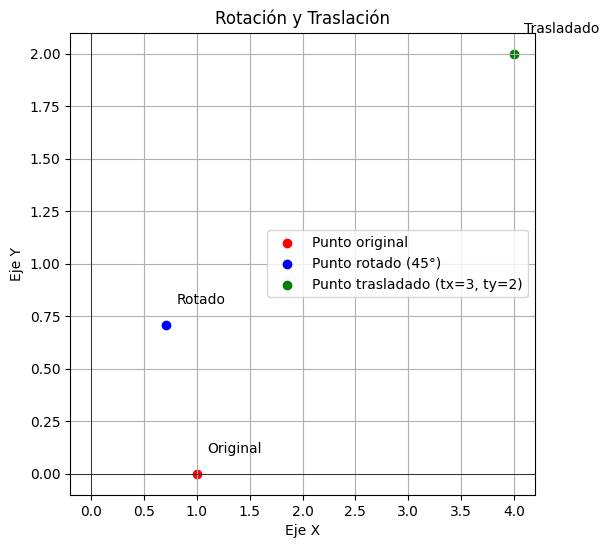

In [ ]:
plt.figure(figsize=(6, 6))
# Dibujamos los ejes X e Y para referencia.
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, which='both')

plt.scatter(punto_original[0], punto_original[1], color='red', label='Punto original')

plt.scatter(punto_rotado[0], punto_rotado[1], color='blue', label='Punto rotado (45°)')

plt.scatter(punto_trasladado[0], punto_trasladado[1], color='green', label='Punto trasladado (tx=3, ty=2)')

plt.annotate("Original", xy=(punto_original[0], punto_original[1]), xytext=(punto_original[0]+0.1, punto_original[1]+0.1))
plt.annotate("Rotado", xy=(punto_rotado[0], punto_rotado[1]), xytext=(punto_rotado[0]+0.1, punto_rotado[1]+0.1))
plt.annotate("Trasladado", xy=(punto_trasladado[0], punto_trasladado[1]), xytext=(punto_trasladado[0]+0.1, punto_trasladado[1]+0.1))

plt.title("Rotación y Traslación")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.legend()
plt.show()